In [27]:
 # Identifying Psychiatric Disorders Using Machine-Learning (Dataset)
# Analyse and visulaise the EEG.machinelearning_data_BRMH.csv from dataset folder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [74]:
datasets_folder = '/Users/aiviewgroup/Desktop/projects/medAI/medai_models/datasets/'
data_file = datasets_folder + 'EEG.machinelearing_data_BRMH.csv'
data=pd.read_csv(data_file)
#print(data.head())
# find the number of rows and columns in the dataset
print(data.shape)
# find all the cloumns in the dataset  
print(data.columns)
# show all the data in the output
print(data.info())

(945, 1149)
Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB
None


In [75]:
data=data.rename(columns={"specific.disorder": "sd", "main.disorder": "md"})

In [76]:
print(data['sd'].value_counts())
print(data['md'].value_counts())

Depressive disorder               199
Schizophrenia                     117
Healthy control                    95
Alcohol use disorder               93
Behavioral addiction disorder      93
Bipolar disorder                   67
Panic disorder                     59
Posttraumatic stress disorder      52
Social anxiety disorder            48
Obsessive compulsitve disorder     46
Acute stress disorder              38
Adjustment disorder                38
Name: sd, dtype: int64
Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Obsessive compulsive disorder          46
Name: md, dtype: int64


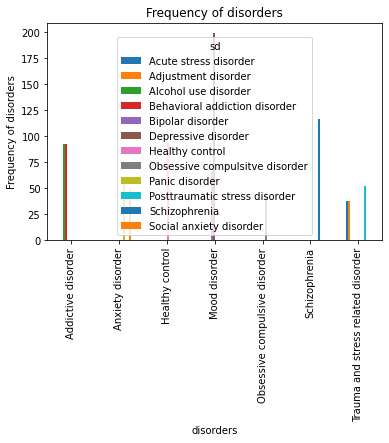

In [77]:
# visulaise the data

pd.crosstab(data.md,data.sd).plot(kind='bar')
plt.title('Frequency of disorders')
plt.xlabel('disorders')
plt.ylabel('Frequency of disorders')
plt.savefig('purchase_fre_job')


In [78]:
# find null values in the dataset
print(data.isnull().sum())
# replace NA values with 0
data = data.fillna(0)
print(data.nunique())
print(data.isnull().sum())
# remove the date column
data = data.drop(['eeg.date'], axis=1)
data=data.drop(['no.'], axis=1)

no.                       0
sex                       0
age                       0
eeg.date                  0
education                15
                         ..
COH.F.gamma.p.P4.r.O1     0
COH.F.gamma.p.P4.s.O2     0
COH.F.gamma.q.T6.r.O1     0
COH.F.gamma.q.T6.s.O2     0
COH.F.gamma.r.O1.s.O2     0
Length: 1149, dtype: int64
no.                      945
sex                        2
age                      654
eeg.date                 722
education                 19
                        ... 
COH.F.gamma.p.P4.r.O1    942
COH.F.gamma.p.P4.s.O2    942
COH.F.gamma.q.T6.r.O1    942
COH.F.gamma.q.T6.s.O2    942
COH.F.gamma.r.O1.s.O2    942
Length: 1149, dtype: int64
no.                      0
sex                      0
age                      0
eeg.date                 0
education                0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1149, dtype: i

In [79]:
data.head()


sex   age  education     IQ                  md                    sd  \
0   M  57.0        0.0    0.0  Addictive disorder  Alcohol use disorder   
1   M  37.0        6.0  120.0  Addictive disorder  Alcohol use disorder   
2   M  32.0       16.0  113.0  Addictive disorder  Alcohol use disorder   
3   M  35.0       18.0  126.0  Addictive disorder  Alcohol use disorder   
4   M  36.0       16.0  112.0  Addictive disorder  Alcohol use disorder   

   AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  ...  \
0         35.998557         21.717375        21.518280        26.825048  ...   
1         13.425118         11.002916        11.942516        15.272216  ...   
2         29.941780         27.544684        17.150159        23.608960  ...   
3         21.496226         21.846832        17.364316        13.833701  ...   
4         37.775667         33.607679        21.865556        21.771413  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1              45.595619              17.510824              26.777368   
2              99.475453              70.654171              39.131547   
3              59.986561              63.822201              36.478254   
4              61.462720              59.166097              51.465531   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              45.678820              30.167520              16.918761   
1              28.201062              57.108861              32.375401   
2              69.920996              71.063644              38.534505   
3              47.117006              84.658376              24.724096   
4              58.635415              80.685608              62.138436   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              48.850427               9.422630              34.507082   
1              60.351749              13.900981              57.831848   
2              69.908764              27.180532              64.803155   
3              50.299349              35.319695              79.822944   
4              75.888749              61.003944              87.455509   

   COH.F.gamma.r.O1.s.O2  
0              28.613029  
1              43.463261  
2              31.485799  
3              41.141873  
4              70.531662  

[5 rows x 1147 columns]

In [80]:
data_copy=data.copy()

In [81]:
md = LabelEncoder()
data['md'] = md.fit_transform(data['md'])
data['md'].value_counts()
# encode column with values 1 and 0
sd=LabelEncoder()
data['sex'] = sd.fit_transform(data['sex'])
data['sex'].value_counts()

1    601
0    344
Name: sex, dtype: int64

In [27]:
# decode the data,, dont run
data['md'] = md.inverse_transform(data['md'])
data['md'].value_counts()

ValueError: y contains previously unseen labels: [2 3 4 5 6]

In [82]:
data=data.drop(['sd'], axis=1)
X = data.drop('md', axis = 1)
y = data['md']

In [83]:
print(X)

     sex   age  education     IQ  AB.A.delta.a.FP1  AB.A.delta.b.FP2  \
0      1  57.0        0.0    0.0         35.998557         21.717375   
1      1  37.0        6.0  120.0         13.425118         11.002916   
2      1  32.0       16.0  113.0         29.941780         27.544684   
3      1  35.0       18.0  126.0         21.496226         21.846832   
4      1  36.0       16.0  112.0         37.775667         33.607679   
..   ...   ...        ...    ...               ...               ...   
940    1  22.0       13.0  116.0         41.851823         36.771496   
941    1  26.0       13.0  118.0         18.986856         19.401387   
942    1  26.0       16.0  113.0         28.781317         32.369230   
943    1  24.0       13.0  107.0         19.929100         25.196375   
944    1  21.0       13.0  105.0         65.195346         69.241972   

     AB.A.delta.c.F7  AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  ...  \
0          21.518280        26.825048        26.611516 

In [84]:
X=X.drop(['IQ','sex','education'], axis=1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [86]:
# remove first row of the dataframe
X_train = X_train.drop(X_train.index[0])
y_train = y_train.drop(y_train.index[0])




In [87]:
print(data_copy['md'])

0      Addictive disorder
1      Addictive disorder
2      Addictive disorder
3      Addictive disorder
4      Addictive disorder
              ...        
940       Healthy control
941       Healthy control
942       Healthy control
943       Healthy control
944       Healthy control
Name: md, Length: 945, dtype: object


In [88]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  
# use random forest regressor to train the data

rfc.fit(X_train, y_train)
estimator = rfc.estimators_[10]

pred_rfc = rfc.predict(X_test)
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = data_copy['md'].unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


In [89]:
# convert dot to png in the current working directory
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])






from IPython.display import Image
Image(filename = 'tree.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.267941 to fit


In [16]:
print(X_train)

[[0.0703415  0.206094   0.20189316 ... 0.44133197 0.61920559 0.6658931 ]
 [0.24127691 0.08761645 0.09064795 ... 0.30879102 0.7394395  0.49579982]
 [0.16945063 0.2533635  0.26454404 ... 0.21386998 0.72452416 0.44758414]
 ...
 [0.05196733 0.15210844 0.12199321 ... 0.24421139 0.68444056 0.23353947]
 [0.24554566 0.11401186 0.11211822 ... 0.32070998 0.64566429 0.48503682]
 [0.10374907 0.15369727 0.10974009 ... 0.45366766 0.69241473 0.68952386]]


In [90]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.36      0.41      0.38        34
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        19
           3       0.34      0.80      0.47        56
           4       1.00      0.11      0.20         9
           5       0.20      0.05      0.08        20
           6       0.20      0.03      0.05        35

    accuracy                           0.33       189
   macro avg       0.30      0.20      0.17       189
weighted avg       0.27      0.33      0.24       189



In [91]:
pred_rfc[:]
# inverse the encoding
inv_pred = md.inverse_transform(pred_rfc)

In [71]:
# GET the f1 score from the classification report and accuracy
from sklearn.metrics import f1_score, accuracy_score
f1_score(y_test, pred_rfc, average='weighted')
accuracy_score(y_test, pred_rfc)

print(accuracy_score(y_test, pred_rfc))

0.328042328042328


In [95]:
print(inv_pred[87])

Schizophrenia
